# **Problem Statement:**

**Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.**

**Do ETL: Extract- Transform and Load data from the heart disease diagnostic database.**

**You can perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age.**

**You can even compare attributes of the data set to extract necessary information. Make thenecessary dashboard with the best you can extract from the data. Use various visualization and features and make the best dashboard.**

**Find key metrics and factors and show the meaningful relationships between attributes.**

# **Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
heart_data=pd.read_csv('/content/heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
columns=list(heart_data)

In [5]:
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.shape

(1025, 14)

In [9]:
heart_data.index

RangeIndex(start=0, stop=1025, step=1)

In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **There are thirteen features in Dataset.**

**age:** The person's age in years 


**sex:** The person's sex (1 = male, 0 = female)


**cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)


**trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)


**chol:** The person's cholesterol measurement in mg/dl


**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach:** The person's maximum heart rate achieved

**exang:** Exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca:** The number of major vessels (0-3)

**thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target:** Heart disease (0 = no, 1 = yes)

# Percentage of people having Heart Disease

In [12]:
target=heart_data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [13]:
#therefore 526 persons were affected by heart_disease in the given dataset.

In [14]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [15]:
heart_data['Heart_Disease']=heart_data['target'].apply(heart_disease)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [16]:
abs_pre=heart_data.groupby('Heart_Disease')['target'].count()
abs_pre

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

# Exploratory Data Analysis (EDA)

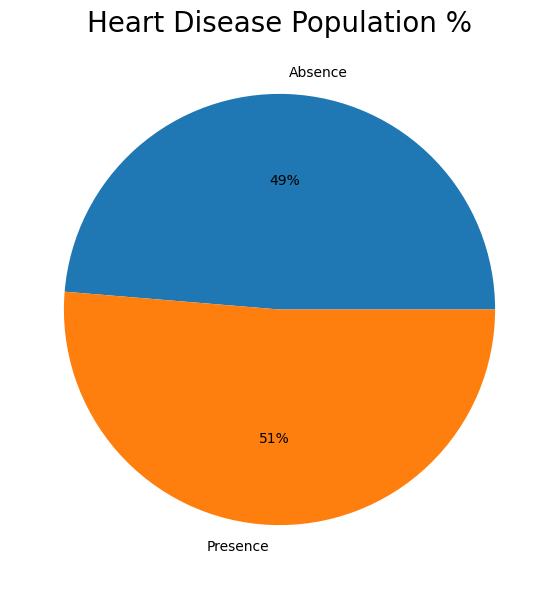

In [17]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7))
plt.pie(abs_pre, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

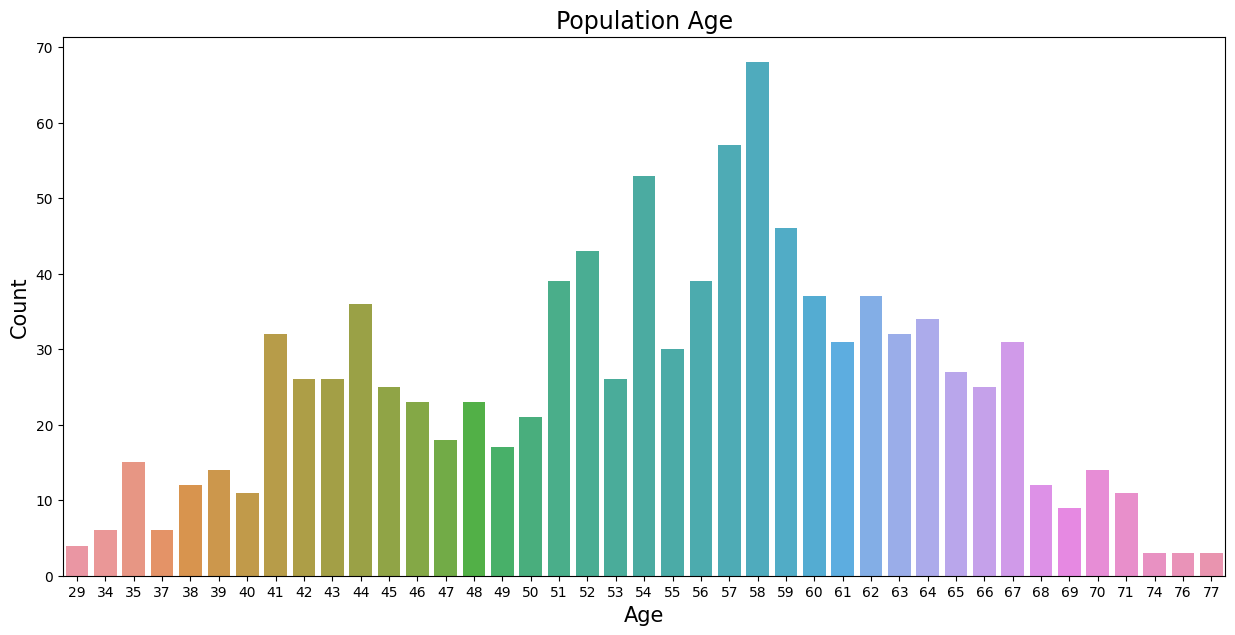

In [18]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=heart_data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [19]:
#Statistical Analysis

Min_Age=heart_data['age'].min()
Max_Age=heart_data['age'].max()
Mean_Age=heart_data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [20]:
#Categorical Analysis

Young_Ages=heart_data[(heart_data['age']>=29) & (heart_data['age']<40)]
Middle_Ages=heart_data[(heart_data['age']>=40) & (heart_data['age']<55)]
Elderly_Ages=heart_data[(heart_data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


In [21]:
Young_Ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Presence
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Presence
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,Presence
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,Presence
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,Presence


In [22]:
Middle_Ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absence
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absence
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,Absence


In [23]:
Elderly_Ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Presence
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absence


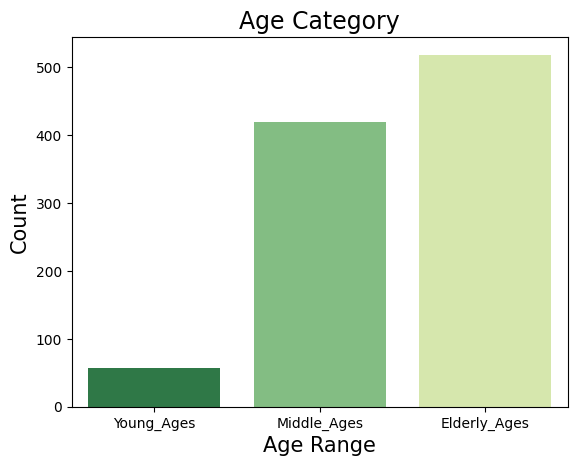

In [24]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [25]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [26]:
#Applying converted data into our dataset with new column - sex1

heart_data['gender']=heart_data['sex'].apply(gender)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [27]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [28]:
#Applying converted data into our dataset with new column - Age_Range

heart_data['Age_Range']=heart_data['age'].apply(age_range)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


In [29]:
heart_data.columns=['AGE','SEX','CP','TRESTBPS','CHOL','FBS','RESTECG','THALACH','EXANG','OLDPEAK','SLOPE','CA','THAL','TARGET','HEART_DISEASE','GENDER','AGE_RANGE']

In [30]:
heart_data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,TARGET,HEART_DISEASE,GENDER,AGE_RANGE
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


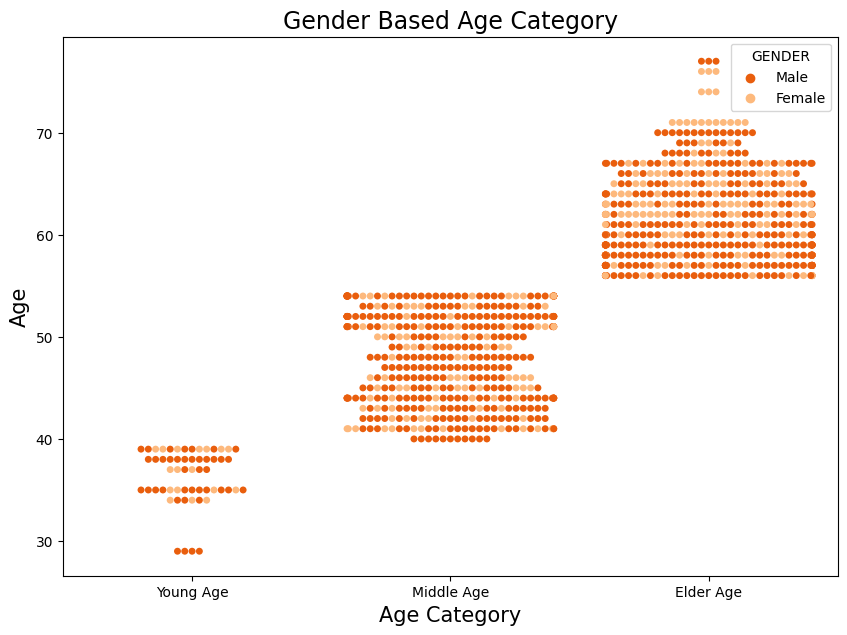

In [31]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='AGE_RANGE', y='AGE', hue='GENDER', data=heart_data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

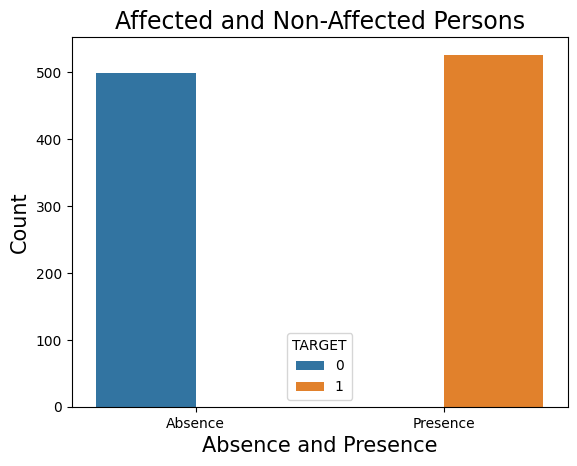

In [32]:
#Affected Persons and Non-affected persons in this dataset visualized using count-plot
sns.countplot(x='HEART_DISEASE', hue='TARGET', data=heart_data)
plt.title("Affected and Non-Affected Persons",fontsize=17)
plt.xlabel("Absence and Presence",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

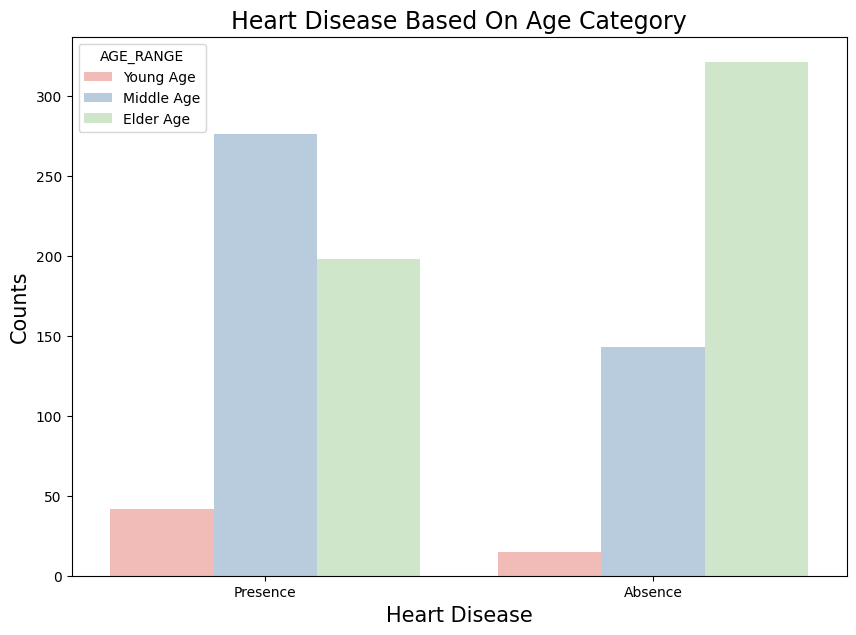

In [33]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='HEART_DISEASE', hue='AGE_RANGE', data=heart_data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

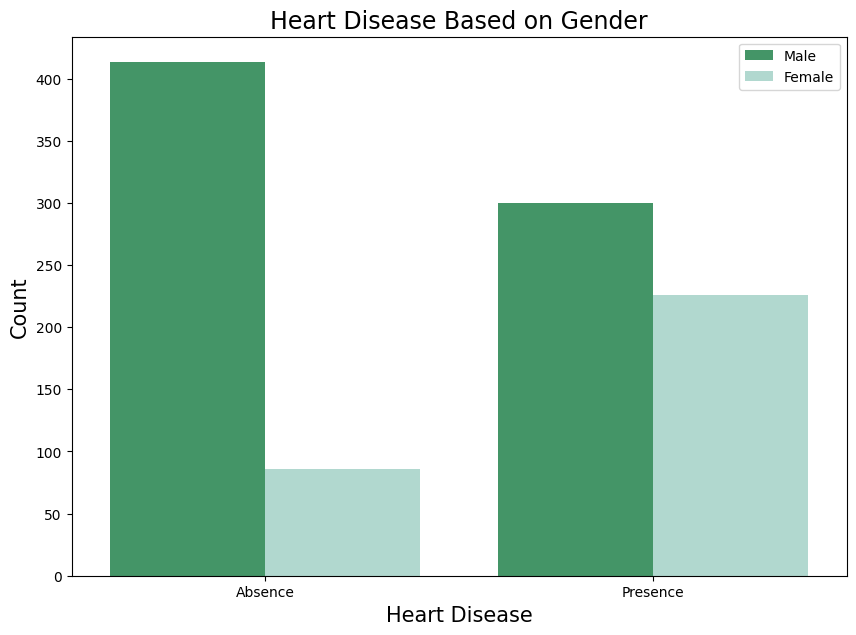

In [34]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.countplot(x=heart_data['HEART_DISEASE'], hue='GENDER', data=heart_data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

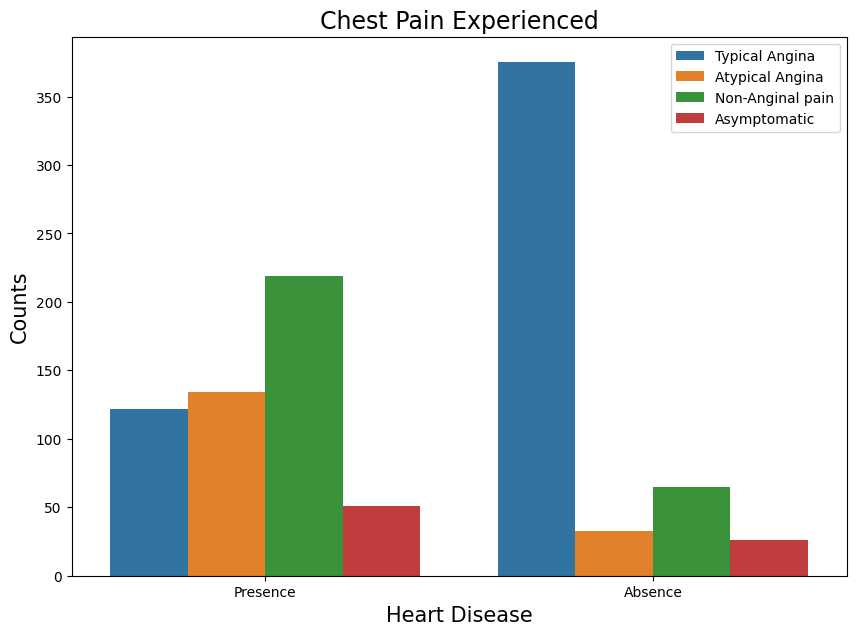

In [35]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.countplot(x=heart_data['HEART_DISEASE'], hue='CP', data=heart_data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

# -> It seems people having asymptomatic chest pain have a higher chance of heart disease

# -> Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

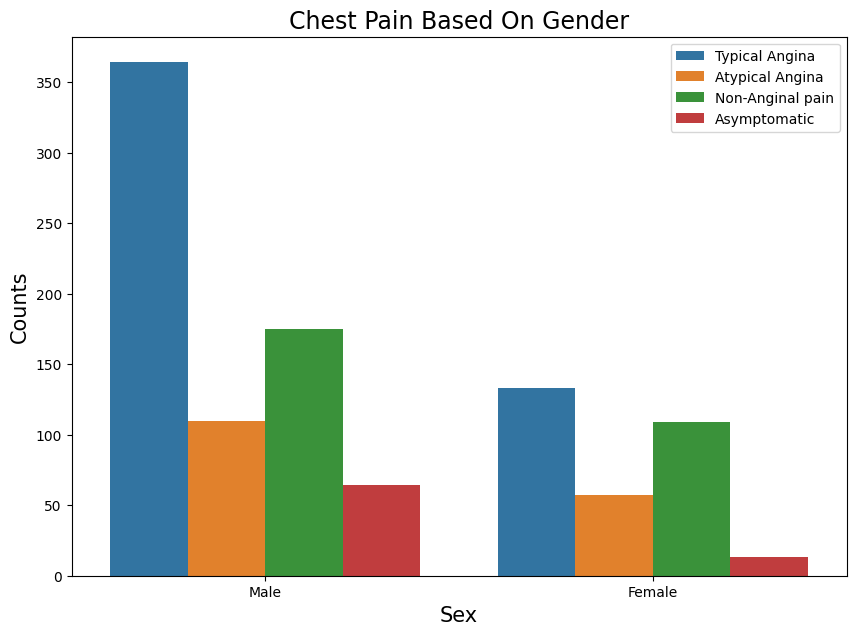

In [36]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.countplot(x=heart_data['GENDER'], hue='CP', data=heart_data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

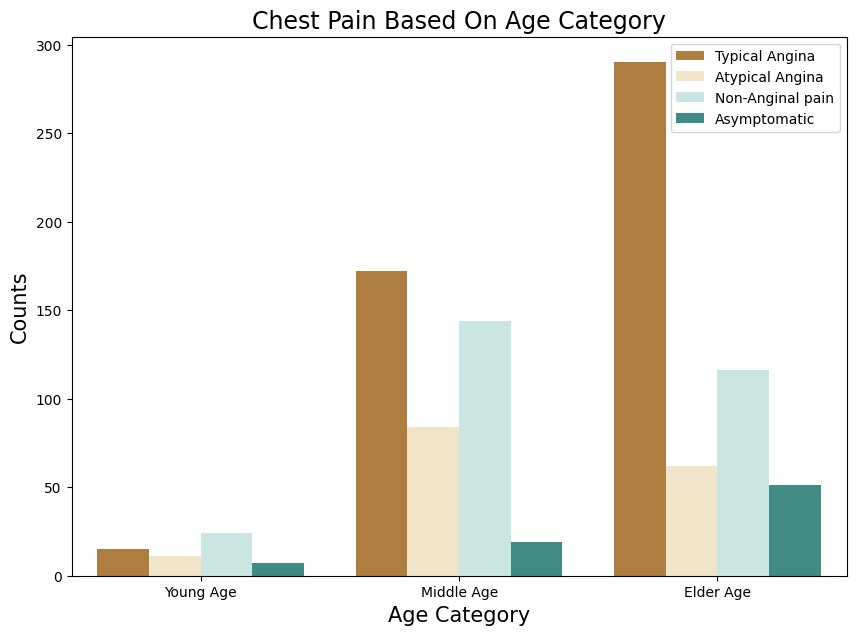

In [37]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.countplot(x=heart_data['AGE_RANGE'], hue='CP', data=heart_data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

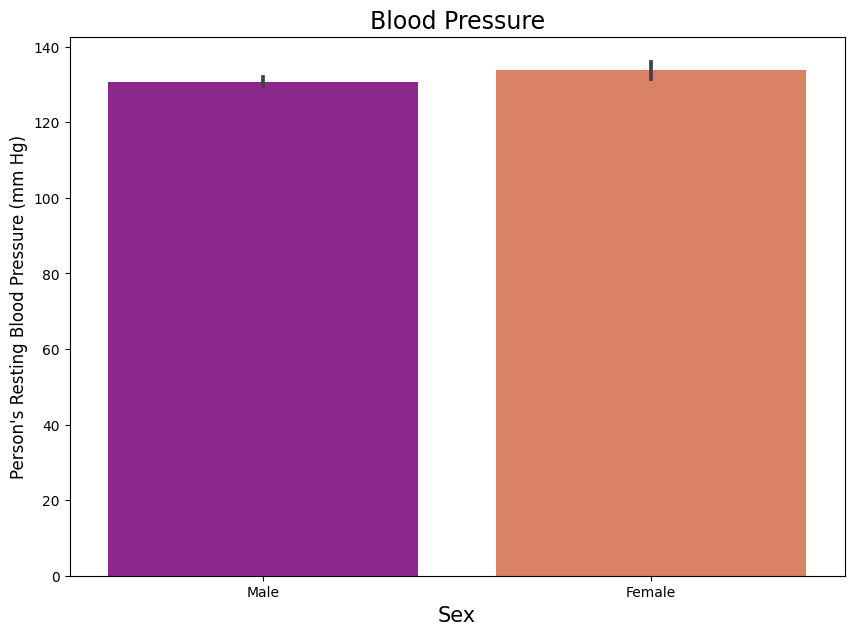

In [38]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='GENDER', y='TRESTBPS', data=heart_data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

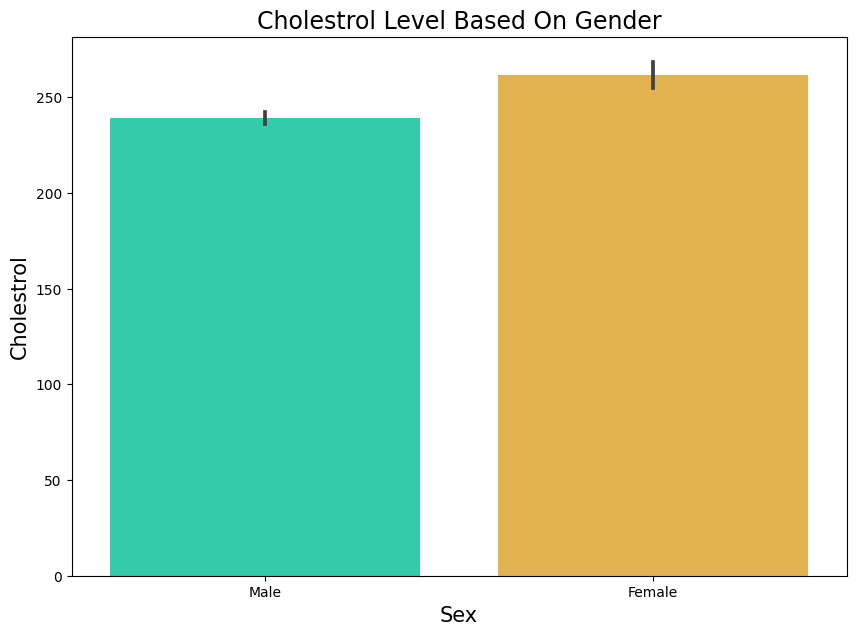

In [39]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='GENDER', y='CHOL', data=heart_data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

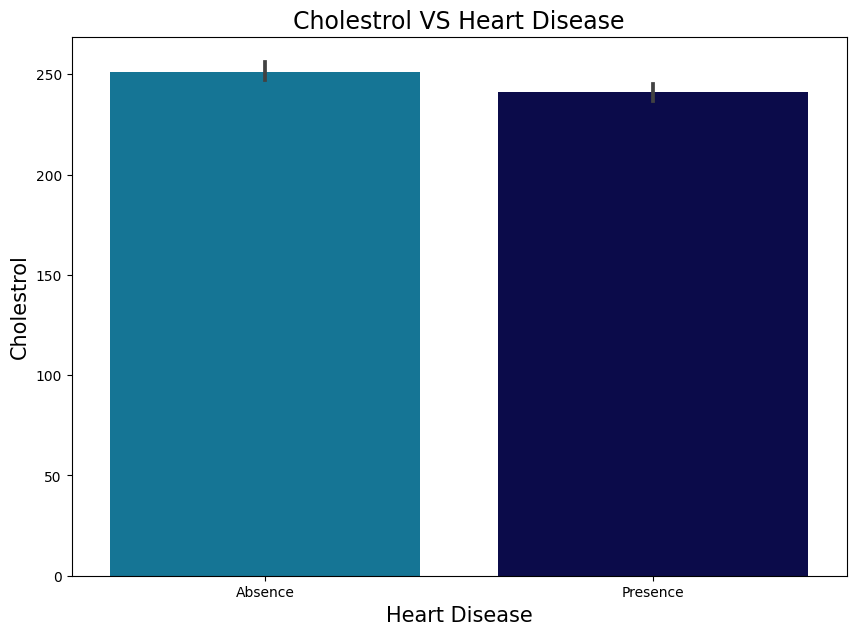

In [40]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='HEART_DISEASE', y='CHOL', data=heart_data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

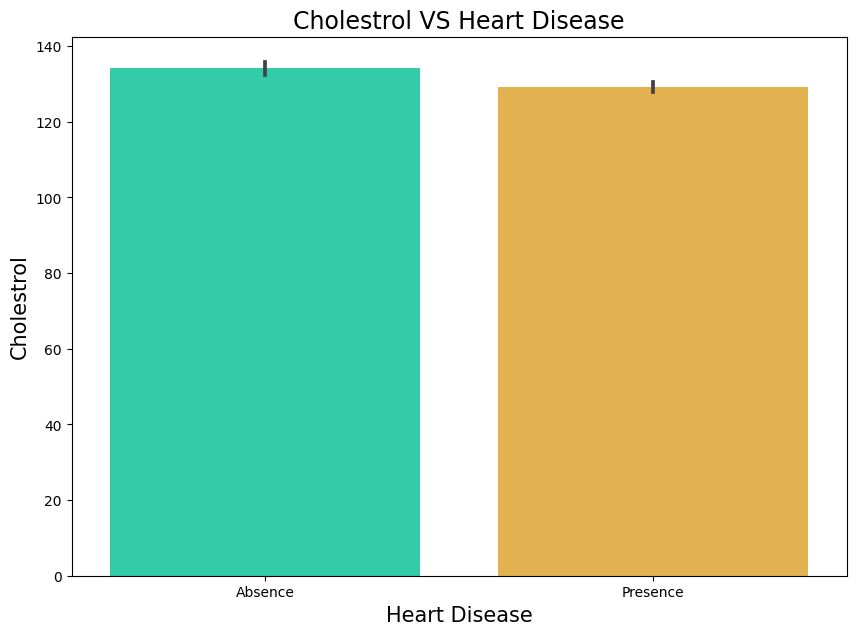

In [41]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='HEART_DISEASE', y='TRESTBPS', data=heart_data, palette='turbo')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

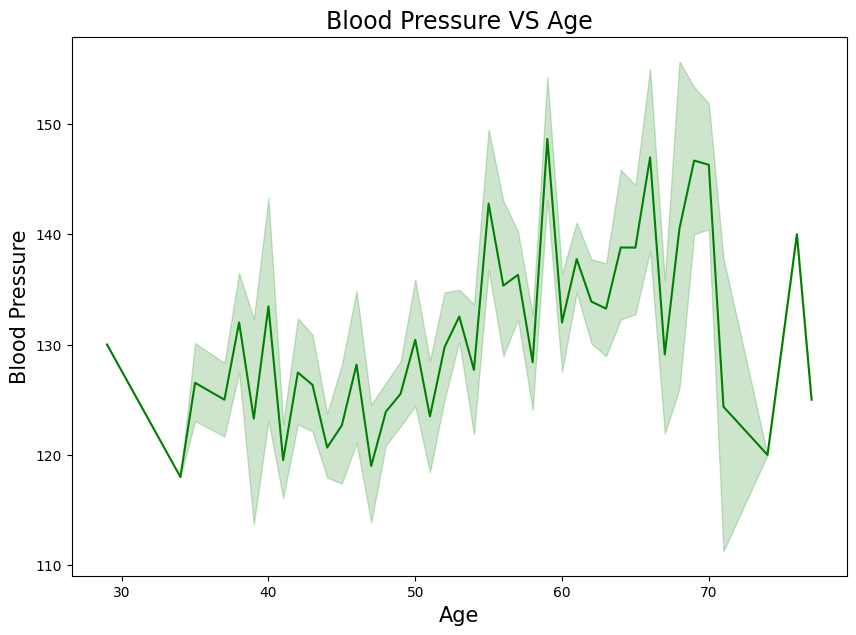

In [42]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.lineplot(x='AGE', y='TRESTBPS', data=heart_data, color='g')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

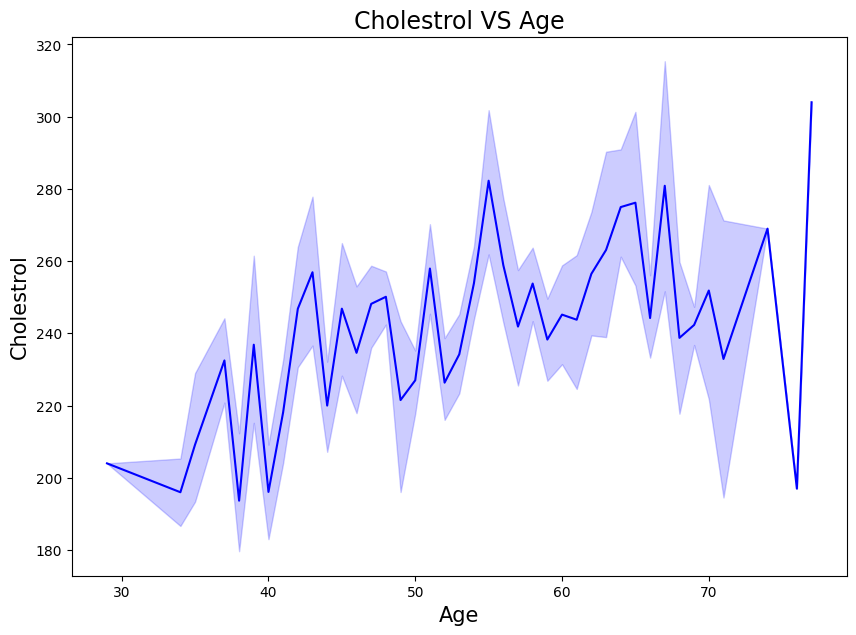

In [44]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.lineplot(x='AGE', y='CHOL', data=heart_data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

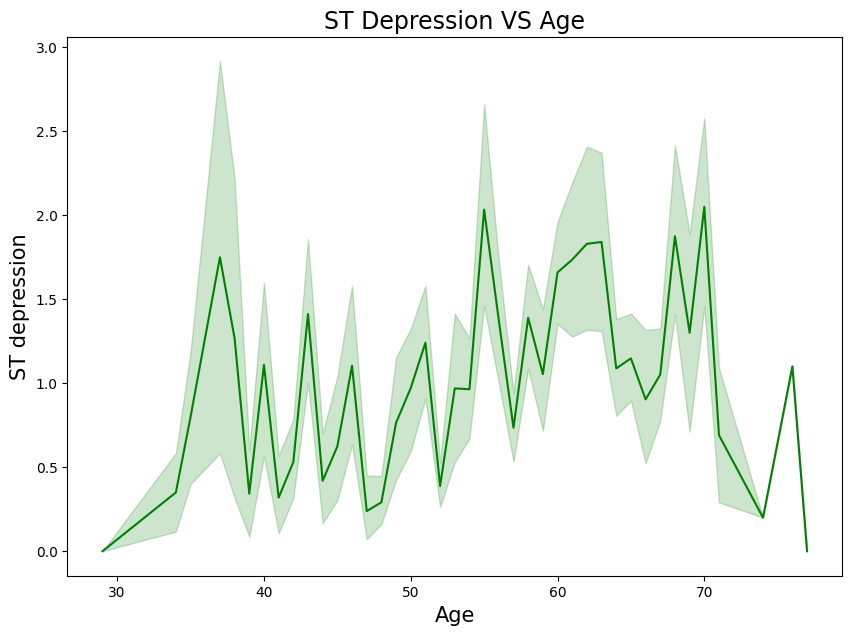

In [46]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.lineplot(x='AGE', y='OLDPEAK', data=heart_data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

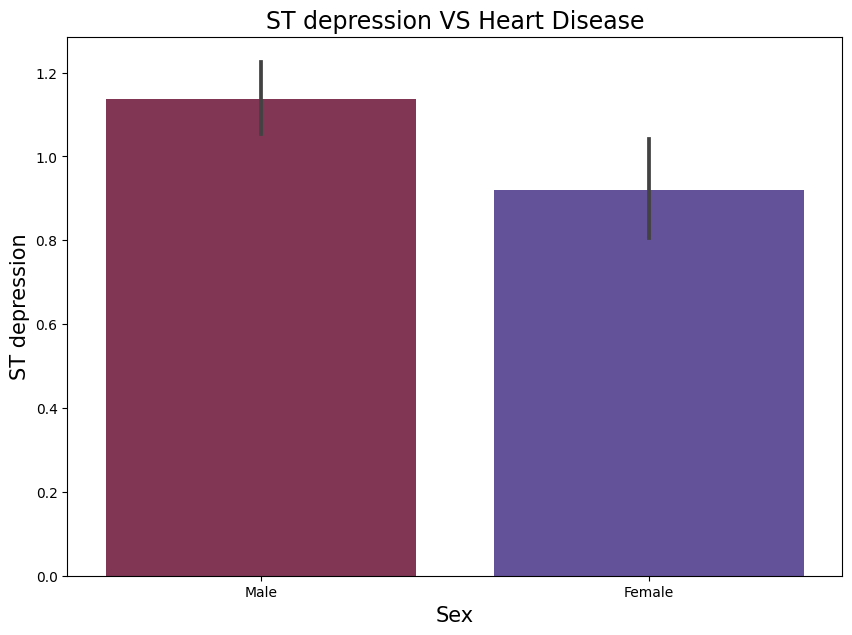

In [47]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='GENDER', y='OLDPEAK', data=heart_data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

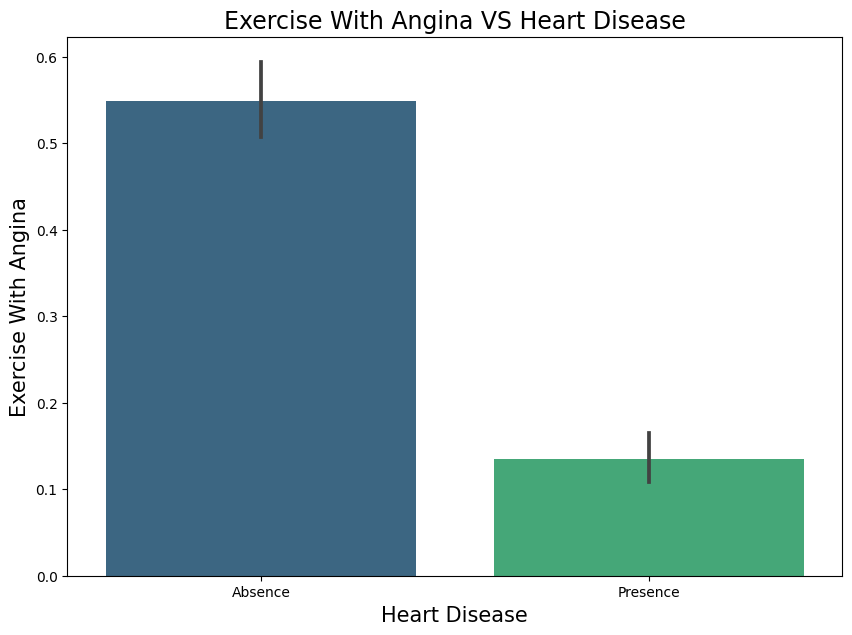

In [48]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='HEART_DISEASE', y='EXANG', data=heart_data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

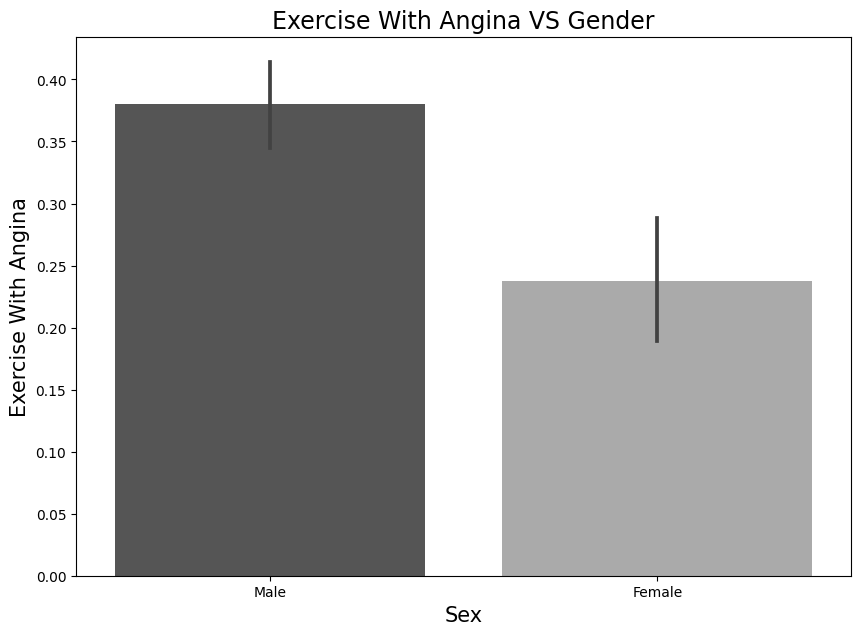

In [49]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(x='GENDER', y='EXANG', data=heart_data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

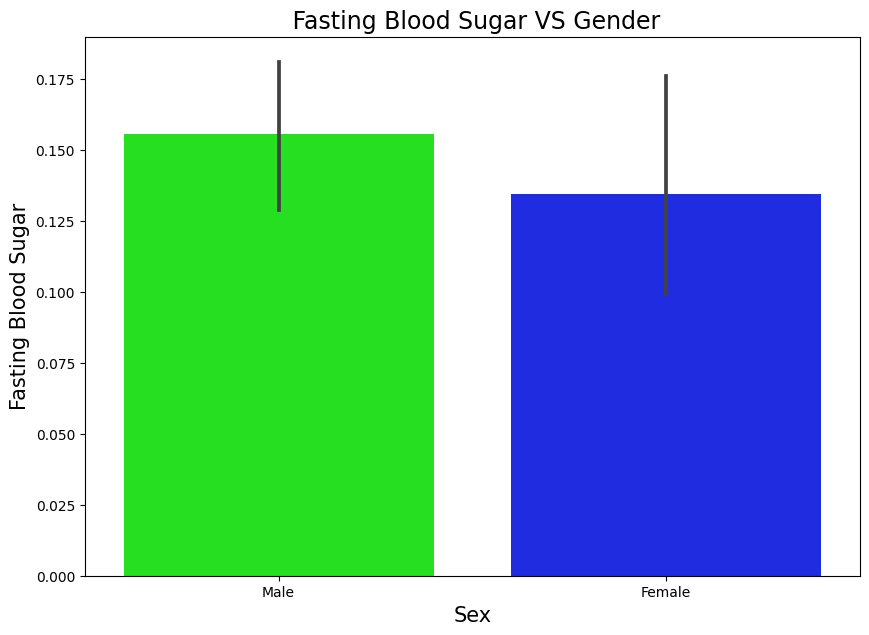

In [50]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.barplot(y='FBS', x='GENDER', data=heart_data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

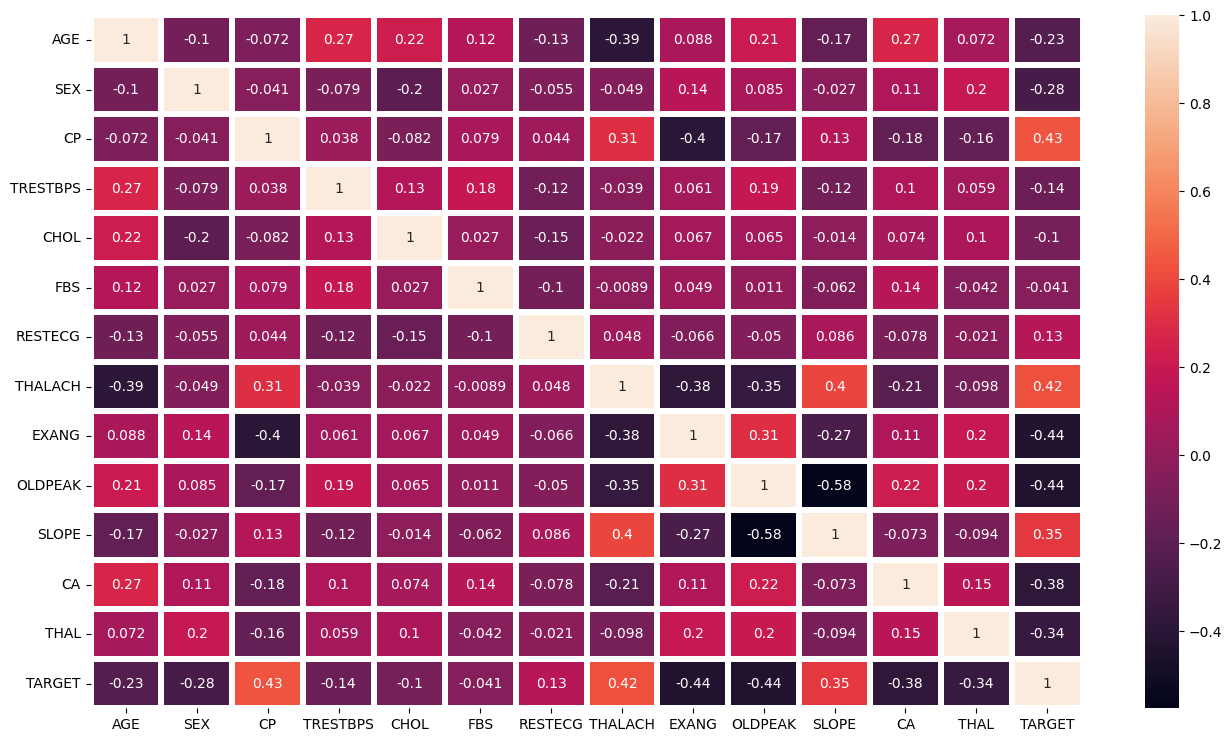

In [51]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(heart_data.corr(), annot=True, linewidth=3)
plt.show()

# Conclusion:
# Thus we have analysed the Heart_disease Dataset and shown various types of visualisation using barplots,countplots,swarmplots and finally Heat-Map etc...
# From the column "TARGET" its easy to visualise and compare the different attributes to each other.